## Search and Filter DataFrame

Agenda:
* Introduce PySparks SQL funtions library
* Select method
* Order By
* Like Operator (for searching a string)
* Substring Search
* Is In Operator
* Starts with, Ends with
* Slicing
* Filtering
* Collecting Results as Objects
* Let's get started!

In [2]:
pip install findspark

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import findspark
findspark.init()

import pyspark # only run after findspark.init()
from pyspark.sql import SparkSession

config = pyspark.SparkConf().setAll([('spark.executor.memory', '8g'),\
                    ('spark.executor.cores', '3'),\
                    ('spark.cores.max', '3'), \
                    ('spark.driver.memory','8g')])

# May take awhile locally
spark = SparkSession.builder.appName("Search_Filter").config(conf=config).getOrCreate()
#spark.set("spark.executor.heartbeatInterval","3600s")

cores = spark._jsc.sc().getExecutorMemoryStatus().keySet().size()
print("You are working with", cores, "core(s)")
spark

You are working with 1 core(s)


In [5]:
fifa = spark.read.csv('FIFA_data.csv',inferSchema=True,header=True)

In [6]:
fifa.limit(5).toPandas()

,_c0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96,33,28,26,6,11,15,14,8,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95,28,31,23,7,11,15,14,11,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94,27,24,33,9,9,15,15,11,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68,15,21,13,90,85,87,88,94,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88,68,58,51,15,13,5,10,13,€196.4M


In [7]:
fifa.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- ID: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Photo: string (nullable = true)
 |-- Nationality: string (nullable = true)
 |-- Flag: string (nullable = true)
 |-- Overall: integer (nullable = true)
 |-- Potential: integer (nullable = true)
 |-- Club: string (nullable = true)
 |-- Club Logo: string (nullable = true)
 |-- Value: string (nullable = true)
 |-- Wage: string (nullable = true)
 |-- Special: integer (nullable = true)
 |-- Preferred Foot: string (nullable = true)
 |-- International Reputation: integer (nullable = true)
 |-- Weak Foot: integer (nullable = true)
 |-- Skill Moves: integer (nullable = true)
 |-- Work Rate: string (nullable = true)
 |-- Body Type: string (nullable = true)
 |-- Real Face: string (nullable = true)
 |-- Position: string (nullable = true)
 |-- Jersey Number: integer (nullable = true)
 |-- Joined: string (nullable = true)
 |-- Loaned From: string (nu

In [8]:
from pyspark.sql.functions import *

In [12]:
fifa.select(['Name','Position','Release Clause']).show(5)

+-----------------+--------+--------------+
|             Name|Position|Release Clause|
+-----------------+--------+--------------+
|         L. Messi|      RF|       €226.5M|
|Cristiano Ronaldo|      ST|       €127.1M|
|        Neymar Jr|      LW|       €228.1M|
|           De Gea|      GK|       €138.6M|
|     K. De Bruyne|     RCM|       €196.4M|
+-----------------+--------+--------------+
only showing top 5 rows



In [7]:
fifa.select(['Name','Position']).orderBy('Name').show(5)

+-------------+--------+
|         Name|Position|
+-------------+--------+
|     A. Abang|      ST|
|A. Abdellaoui|      LB|
| A. Abdennour|      CB|
|      A. Abdi|      CM|
|A. Abdu Jaber|      ST|
+-------------+--------+
only showing top 5 rows



In [16]:
# One way
fifa.select(["Name","Club"]).where(fifa.Club.like("FC%")).show(5,False)

+---------------+-----------------+
|Name           |Club             |
+---------------+-----------------+
|L. Messi       |FC Barcelona     |
|L. Suárez      |FC Barcelona     |
|R. Lewandowski |FC Bayern München|
|M. ter Stegen  |FC Barcelona     |
|Sergio Busquets|FC Barcelona     |
+---------------+-----------------+
only showing top 5 rows



In [17]:
# Another way 
fifa.select("Name","Club").where(fifa.Club.startswith("FC")).limit(4).toPandas()

,Name,Club
0,L. Messi,FC Barcelona
1,L. Suárez,FC Barcelona
2,R. Lewandowski,FC Bayern München
3,M. ter Stegen,FC Barcelona


In [18]:
fifa.select("Name","Age").sort(desc("Age")).show(5)

+-------------+---+
|         Name|Age|
+-------------+---+
|     O. Pérez| 45|
|K. Pilkington| 44|
|    T. Warner| 44|
|  S. Narazaki| 42|
|    J. Villar| 41|
+-------------+---+
only showing top 5 rows



In [11]:
fifa[fifa.Name.isin("L. Messi", "Cristiano Ronaldo")].limit(4).toPandas()

,_c0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96,33,28,26,6,11,15,14,8,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95,28,31,23,7,11,15,14,11,€127.1M


In [20]:
fifa.select("Release Clause",fifa["Release Clause"].substr(1,1)).show(5,False)

+--------------+-------------------------------+
|Release Clause|substring(Release Clause, 1, 1)|
+--------------+-------------------------------+
|€226.5M       |€                              |
|€127.1M       |€                              |
|€228.1M       |€                              |
|€138.6M       |€                              |
|€196.4M       |€                              |
+--------------+-------------------------------+
only showing top 5 rows



In [21]:
fifa.filter("Age>40").limit(4).toPandas()

,_c0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,1120,156092,J. Villar,41,https://cdn.sofifa.org/players/4/19/156092.png,Paraguay,https://cdn.sofifa.org/flags/58.png,77,77,None,...,55,13,13,14,75,75,74,78,77,None
1,4228,3665,B. Nivet,41,https://cdn.sofifa.org/players/4/19/3665.png,France,https://cdn.sofifa.org/flags/18.png,71,71,ESTAC Troyes,...,82,58,56,43,11,7,8,14,7,None
2,4741,140029,O. Pérez,45,https://cdn.sofifa.org/players/4/19/140029.png,Mexico,https://cdn.sofifa.org/flags/83.png,71,71,Pachuca,...,62,23,12,11,70,64,65,73,74,€272K
3,7225,142998,C. Muñoz,41,https://cdn.sofifa.org/players/4/19/142998.png,Argentina,https://cdn.sofifa.org/flags/52.png,68,68,CD Universidad de Concepción,...,62,18,14,19,67,65,68,71,68,€84K


In [32]:
result = fifa.select(['Name','Overall']).filter(fifa['Overall']>90).orderBy(desc("Overall"))

In [33]:
result.show(5)

+-----------------+-------+
|             Name|Overall|
+-----------------+-------+
|Cristiano Ronaldo|     94|
|         L. Messi|     94|
|        Neymar Jr|     92|
|           De Gea|     91|
|     K. De Bruyne|     91|
+-----------------+-------+
only showing top 5 rows



In [27]:
result.toPandas()["Name"].tolist()

['L. Messi',
 'Cristiano Ronaldo',
 'Neymar Jr',
 'De Gea',
 'K. De Bruyne',
 'E. Hazard',
 'L. Modrić',
 'L. Suárez',
 'Sergio Ramos']

In [34]:
result.toPandas()["Overall"].tolist()

[94, 94, 92, 91, 91, 91, 91, 91, 91]

In [35]:
import matplotlib.pyplot as plt

In [36]:
type(result)

pyspark.sql.dataframe.DataFrame

In [37]:
x = result.toPandas()['Name'].tolist()
y = result.toPandas()['Overall'].tolist()

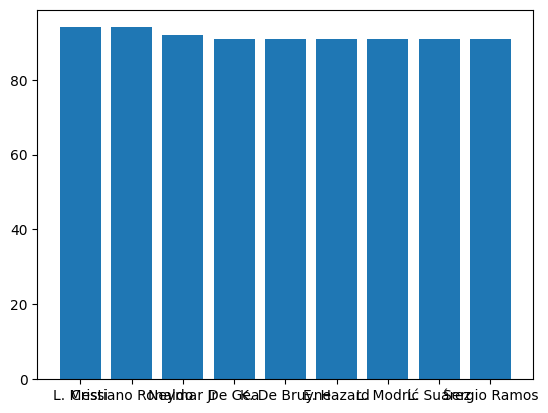

In [38]:
plt.bar(x,y)
plt.show()

In [39]:
result_one = fifa.select(['Name','Age']).filter('Age > 40').sort(desc('age'))

In [40]:
x = result_one.toPandas()['Name'].tolist()

In [41]:
y = result_one.toPandas()['Age'].tolist()

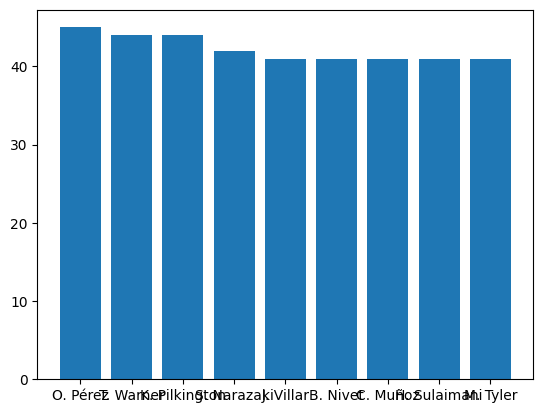

In [42]:
plt.bar(x,y)
plt.show()

In [43]:
fifa.select("Photo",fifa.Photo.substr(-4,4)).show(5,False)

+----------------------------------------------+-----------------------+
|Photo                                         |substring(Photo, -4, 4)|
+----------------------------------------------+-----------------------+
|https://cdn.sofifa.org/players/4/19/158023.png|.png                   |
|https://cdn.sofifa.org/players/4/19/20801.png |.png                   |
|https://cdn.sofifa.org/players/4/19/190871.png|.png                   |
|https://cdn.sofifa.org/players/4/19/193080.png|.png                   |
|https://cdn.sofifa.org/players/4/19/192985.png|.png                   |
+----------------------------------------------+-----------------------+
only showing top 5 rows



In [44]:
fifa[fifa.Club.isin("FC Barcelona","Juventus")].limit(4).toPandas()

,_c0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96,33,28,26,6,11,15,14,8,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95,28,31,23,7,11,15,14,11,€127.1M
2,7,176580,L. Suárez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,FC Barcelona,...,85,62,45,38,27,25,31,33,37,€164M
3,15,211110,P. Dybala,24,https://cdn.sofifa.org/players/4/19/211110.png,Argentina,https://cdn.sofifa.org/flags/52.png,89,94,Juventus,...,84,23,20,20,5,4,4,5,8,€153.5M


In [45]:
fifa.select("Name","Club").where(fifa.Name.startswith("L")) \
                                  .where(fifa.Name.endswith("i")).limit(4).toPandas()

,Name,Club
0,L. Messi,FC Barcelona
1,L. Bonucci,Juventus
2,L. Fabiański,West Ham United
3,L. Pellegrini,Roma


In [47]:
from pyspark.sql.functions import slice

In [48]:
df = spark.createDataFrame([([1, 2, 3],), ([4, 5],)], ['x']) 
df.show()
df.select(slice(df.x, 2, 2).alias("sliced")).show()

+---------+
|        x|
+---------+
|[1, 2, 3]|
|   [4, 5]|
+---------+

+------+
|sliced|
+------+
|[2, 3]|
|   [5]|
+------+



In [94]:
df.toPandas()

,x
0,"[1, 2, 3]"
1,"[4, 5]"


In [96]:
df.select(slice(df.x,2,1)).show()

+--------------+
|slice(x, 2, 1)|
+--------------+
|           [2]|
|           [5]|
+--------------+



In [99]:
df = spark.createDataFrame([([1, 2, 3],[1, 2, 3],), ([4, 5],[1, 2, 3],)], ['x']) 
df.show()

+---------+---------+
|        x|       _2|
+---------+---------+
|[1, 2, 3]|[1, 2, 3]|
|   [4, 5]|[1, 2, 3]|
+---------+---------+

